<center><h1>Modelamiento - Identificación de Usuario</header1></center>

Presentado por: Carlos Lucio, Luis Olalla  <br>
Fecha: 12/08/2022

# Importación de librerias necesarias

In [2]:
#Para esta actividad se importarán las siguientes librerías:

#importar libreria opencv para procesar las imágenes
import cv2
#libreria de cálculos numéricos
import numpy as np
#libreria dependiente de sistema operativo
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
#Libreria de coleccion de archivos
import shutil
#libreria para devolver rutas de archivos
import glob
#Libreria pandas para analisis de datos
import pandas as pd
#Libreria para graficar los datos
import matplotlib.pyplot as plt
#Libreria seaborn para distribuciones aleatorias
import seaborn as sn
#Libreria  de código abierto para aprendizaje automático 
from tensorflow.keras.utils import img_to_array,  array_to_img, img_to_array, load_img
#Libreria de redes neuronales para generar imagen
from keras.preprocessing.image import ImageDataGenerator
#Libreria que permite editar imagenes
from  PIL  import Image
#Libreria para remover el fondo
from rembg import remove
#Libreria de tecnicas de aprendizaje automatico
from sklearn.preprocessing import MinMaxScaler
#Libreria que permite almacenar datos binarios
import h5py
#Libreria que permite retrasar la ejecucion
from time import sleep
#importar libreria pathlib
import pathlib
#libreria TF
import tensorflow as TF


## Cargar dataset

In [11]:
#Código para cargar el Dataset
direccion = pathlib.Path(r"C:\Users\Usuario\Documents\SEXTO\ASIGNATURAS\INTELIGENCIA ARTIFICIAL\TERCER PARCIAL\ProyectoIA\Dataset") #Direccion de la ruta principal
tamanio_lote = 16 #tamanio del lote
img_alto = 32 #alto de la imagen
img_ancho = 32 #ancho de la i
dsFotos = TF.keras.preprocessing.image_dataset_from_directory(
    direccion,label_mode="categorical")

Found 15 files belonging to 5 classes.


## Listar las clases del dataset

In [12]:
#Código para cargar el Dataset
#Ruta del dataset de las imagenes principales
images_path = "./Dataset"
#cargar la ruta del dataset
class_names = os.listdir(images_path)
#Ordenar los nombres de las clases
class_names.sort()
#imprimir los nombres de las clases
print(class_names)

['CevallosJoan', 'Jhon Zambrano', 'LucioCarlos', 'OlallaLuis', 'RivasSelena']


In [13]:
#for para recorrer el nombre de la clase
for class_name in class_names:
    #Seleccionar la ruta y el nombre de la clase
    cur_path = images_path + "/" + class_name
    #listar los elementos en la ruta actual
    elements = os.listdir(cur_path)
    
    #For para recorrer a los elementos 
    for element in elements:
        #Copiar las imagenes del dataset
        print("Copying Image - {} in Dataset/{}".format(element, class_name))
        #Especificar el origen de las iamgenes
        src = os.path.join(images_path + "/" + class_name, element) # origen
        #Destino de las imagenes copiadas
        dst = os.path.join("./Dataset_Aumentado/" + class_name, element) 
        #coleccionar cada archivo
        shutil.copy(src, dst)

Copying Image - L00376416_1.jpg in Dataset/CevallosJoan
Copying Image - L00376416_2.jpg in Dataset/CevallosJoan
Copying Image - L00376416_3.jpg in Dataset/CevallosJoan
Copying Image - L00392993_Centro.jpg in Dataset/Jhon Zambrano
Copying Image - L00392993_LD.jpg in Dataset/Jhon Zambrano
Copying Image - L00392993_LI.jpg in Dataset/Jhon Zambrano
Copying Image - L00393009_1.jpg in Dataset/LucioCarlos
Copying Image - L00393009_2.jpg in Dataset/LucioCarlos
Copying Image - L00393009_3.jpg in Dataset/LucioCarlos
Copying Image - L00393001_1.jpg in Dataset/OlallaLuis
Copying Image - L00393001_2.jpg in Dataset/OlallaLuis
Copying Image - L00393001_3.jpg in Dataset/OlallaLuis
Copying Image - L00376689_1.jpg in Dataset/RivasSelena
Copying Image - L00376689_2.jpg in Dataset/RivasSelena
Copying Image - L00376689_3.jpg in Dataset/RivasSelena


# **Aumento de datos**

In [14]:
#Generador de aumento de imagenes
datagen = ImageDataGenerator(
    #rotacion del rango de imagen
        rotation_range=40,
    #Desplazamiento ancho de rango
        width_shift_range=0.2,
    #Rango desplazamiento altura
        height_shift_range=0.2,
    #Reescalar
        rescale=1./255,
    #Rango de corte
        shear_range=0.2,
    #Rango de enfoque
        zoom_range=0.4,
    #Volteo horizontal
        horizontal_flip=True,
    #Modo de llenado
        fill_mode='nearest')

**CLASE CEVALLOS JOAN**

In [15]:
#Ruta de la clase Joan Cevallos
os.chdir(r"C:\Users\Usuario\Documents\SEXTO\ASIGNATURAS\INTELIGENCIA ARTIFICIAL\TERCER PARCIAL\ProyectoIA\Dataset_Aumentado\CevallosJoan")
#For para listar la ruta y cargar las imagenes
for path in os.listdir():
    img = load_img(f"{path}")
    #Colocar array de las imgenes
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    #remodelar las imagenes
    x = x.reshape((1,) + x.shape)
    i = 0
    #For para agregar un lote en la imagen
    for batch in datagen.flow(x, batch_size=1,
        #Guardar en el directorio
            save_to_dir=".", 
        #colocar prefijo de la clase
            save_prefix= 'CevallosJoan', 
        #formato de guardado
            save_format='jpg'):
        #contador de imagenes
        i += 1
        #Contador del numero de imagenes
        if i == 9:     ## creates 10 image form 1 image 
            break 

**CLASE RIVAS SELENA**

In [16]:
os.chdir(r"C:\Users\Usuario\Documents\SEXTO\ASIGNATURAS\INTELIGENCIA ARTIFICIAL\TERCER PARCIAL\ProyectoIA\Dataset_Aumentado\RivasSelena")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'RivasSelena', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break 

**CLASE JHON ZAMBRANO**

In [17]:
os.chdir(r"C:\Users\Usuario\Documents\SEXTO\ASIGNATURAS\INTELIGENCIA ARTIFICIAL\TERCER PARCIAL\ProyectoIA\Dataset_Aumentado\Jhon Zambrano")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'Jhon Zambrano', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break 

**CLASE LUCIO CARLOS**

In [18]:
os.chdir(r"C:\Users\Usuario\Documents\SEXTO\ASIGNATURAS\INTELIGENCIA ARTIFICIAL\TERCER PARCIAL\ProyectoIA\Dataset_Aumentado\LucioCarlos")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'LucioCarlos', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break 

**CLASE OLALLA LUIS**

In [19]:
os.chdir(r"C:\Users\Usuario\Documents\SEXTO\ASIGNATURAS\INTELIGENCIA ARTIFICIAL\TERCER PARCIAL\ProyectoIA\Dataset_Aumentado\OlallaLuis")
for path in os.listdir():
    img = load_img(f"{path}")
    x = img_to_array(img)    # this is a Numpy array with shape (3, 150, 150)
    x = x.reshape((1,) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size=1,
            save_to_dir=".", 
            save_prefix= 'OlallaLuis', 
            save_format='jpg'):
        i += 1
        if i == 9:     ## creates 10 image form 1 image 
            break 

# **Filtro NLM para eliminación de ruido de imagen**

In [20]:
os.chdir(r"C:\Users\Usuario\Documents\SEXTO\ASIGNATURAS\INTELIGENCIA ARTIFICIAL\TERCER PARCIAL\ProyectoIA")
images_path = "./Dataset_Aumentado"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['CevallosJoan', 'Jhon Zambrano', 'LucioCarlos', 'OlallaLuis', 'RivasSelena']


In [21]:
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1

    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # read the images path
        image = cv2.imread(file)
        # denoising images
        dst = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
        b,g,r = cv2.split(dst)
        rgb_dst = cv2.merge([r,g,b])
        # save images
        save_path = './Dataset_Aumentado_SinRuido/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.jpg'),
                    cv2.cvtColor(rgb_dst,cv2.COLOR_RGB2BGR))
        

        # show loop update
        i += 1

Processing Image - 1 in CevallosJoan
Processing Image - 2 in CevallosJoan
Processing Image - 3 in CevallosJoan
Processing Image - 4 in CevallosJoan
Processing Image - 5 in CevallosJoan
Processing Image - 6 in CevallosJoan
Processing Image - 7 in CevallosJoan
Processing Image - 8 in CevallosJoan
Processing Image - 9 in CevallosJoan
Processing Image - 10 in CevallosJoan
Processing Image - 11 in CevallosJoan
Processing Image - 12 in CevallosJoan
Processing Image - 13 in CevallosJoan
Processing Image - 14 in CevallosJoan
Processing Image - 15 in CevallosJoan
Processing Image - 16 in CevallosJoan
Processing Image - 17 in CevallosJoan
Processing Image - 18 in CevallosJoan
Processing Image - 19 in CevallosJoan
Processing Image - 20 in CevallosJoan
Processing Image - 21 in CevallosJoan
Processing Image - 22 in CevallosJoan
Processing Image - 23 in CevallosJoan
Processing Image - 24 in CevallosJoan
Processing Image - 25 in CevallosJoan
Processing Image - 26 in CevallosJoan
Processing Image - 27

# **Eliminación de fondo**

In [22]:
images_path = "./Dataset_Aumentado_SinRuido"
class_names = os.listdir(images_path)
class_names.sort()
print(class_names)

['CevallosJoan', 'Jhon Zambrano', 'LucioCarlos', 'OlallaLuis', 'RivasSelena']


In [23]:
for class_name in class_names:
    cur_path = images_path + "/" + class_name
    cur_label = class_name
    i = 1

    for file in glob.glob(cur_path + "/*"):
        print("Processing Image - {} in {}".format(i, cur_label))
        # read the images path
        image = cv2.imread(file)
        # remove bg 
        output = remove(image)
        # save images
        save_path = './Dataset_Aumentado_SinFondo/'+ cur_label
        cv2.imwrite(os.path.join(save_path , cur_label + '_' + str(i) + '.png'), output)
        

        # show loop update
        i += 1

Processing Image - 1 in CevallosJoan
Processing Image - 2 in CevallosJoan
Processing Image - 3 in CevallosJoan
Processing Image - 4 in CevallosJoan
Processing Image - 5 in CevallosJoan
Processing Image - 6 in CevallosJoan
Processing Image - 7 in CevallosJoan
Processing Image - 8 in CevallosJoan
Processing Image - 9 in CevallosJoan
Processing Image - 10 in CevallosJoan
Processing Image - 11 in CevallosJoan
Processing Image - 12 in CevallosJoan
Processing Image - 13 in CevallosJoan
Processing Image - 14 in CevallosJoan
Processing Image - 15 in CevallosJoan
Processing Image - 16 in CevallosJoan
Processing Image - 17 in CevallosJoan
Processing Image - 18 in CevallosJoan
Processing Image - 19 in CevallosJoan
Processing Image - 20 in CevallosJoan
Processing Image - 21 in CevallosJoan
Processing Image - 22 in CevallosJoan
Processing Image - 23 in CevallosJoan
Processing Image - 24 in CevallosJoan
Processing Image - 25 in CevallosJoan
Processing Image - 26 in CevallosJoan
Processing Image - 27

## Segunda parte Modelo

In [13]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Data loading and exploration

Haga una descripción de la fuente de dayos utilizada (Incluya los enlaces necesarios).

In [15]:
fpath = './Dataset_Aumentado_SinFondo'
random_seed = 9

categories = os.listdir(fpath)
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['CevallosJoan', 'Jhon Zambrano', 'LucioCarlos', 'OlallaLuis', 'RivasSelena'] 

No. of categories =  5


In [16]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            img_array = Image.fromarray(img, 'RGB')
            
            img_lst.append(np.array(img_array))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  149 
No. of labels loaded =  149
<class 'list'> <class 'list'>


In [17]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (149, 192, 192, 3) 
Labels shape =  (149,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


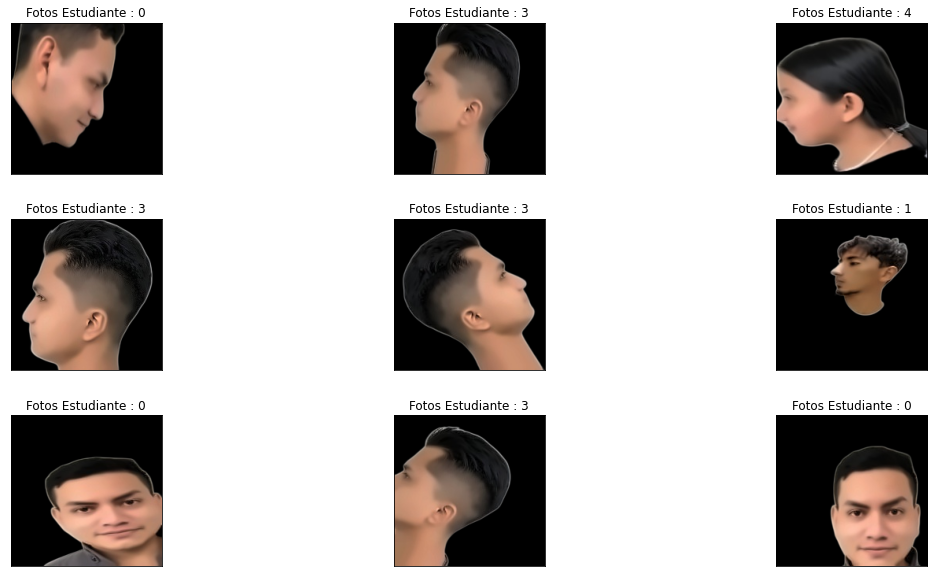

In [18]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Fotos Estudiante : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

## Prepare data for training the CNN model

In [19]:
#1-step in data shuffling

#get equally spaced numbers in a given range
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

#shuffle all the equally spaced values in list 'n'
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148]

'n' values after shuffling =  [ 76  89 135 103 123  37  26   3 107   9  25  70  97  90  39  80  31 139
 100  47  28  27 110  20  53  75  43  69   8  85  98 127  23  88  78  81
  55  45 118   7  17 111  60  44 102  67   6  68  35  73 116  51  10 132
 109 143 136  79  21 133  38   2  83 115  11  57 147 121  95  96  36  32
 131  87  14 106  82 105  94  48  84  86

In [20]:
#2-step in data shuffling

#shuffle images and corresponding labels data in both the lists
images = images[n]
labels = labels[n]

print("Images shape after shuffling = ",images.shape,"\nLabels shape after shuffling = ",labels.shape)

Images shape after shuffling =  (149, 192, 192, 3) 
Labels shape after shuffling =  (149,)


In [21]:
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Images shape after normalization = ",images.shape)

Images shape after normalization =  (149, 192, 192, 3)


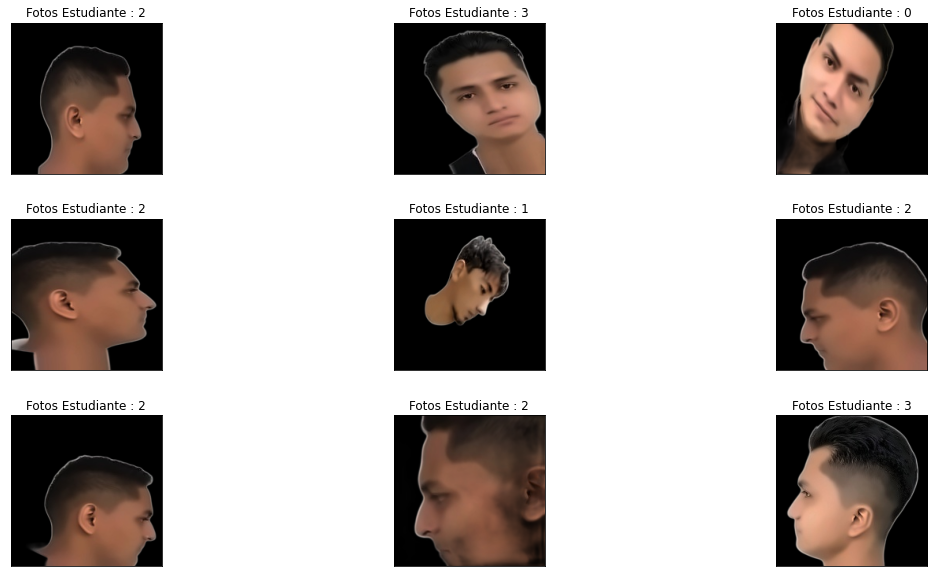

In [22]:
display_rand_images(images, labels)

In [23]:
train_ds, test_ds, train_labels, test_labels = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

print("train_ds shape = ",train_ds.shape)
print("train_labels shape = ",train_labels.shape)
print("\ntest_ds shape = ",test_ds.shape)
print("test_labels shape = ",test_labels.shape)

train_ds shape =  (119, 192, 192, 3)
train_labels shape =  (119,)

test_ds shape =  (30, 192, 192, 3)
test_labels shape =  (30,)


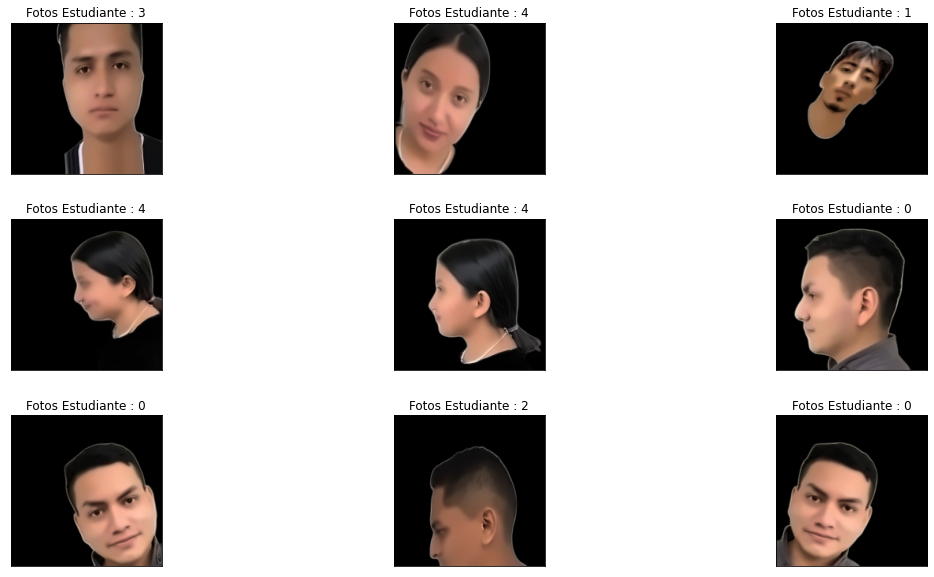

In [24]:
display_rand_images(train_ds, train_labels)

In [25]:
## Resizing images
train_ds = tf.image.resize(train_ds, (227, 227))
test_ds = tf.image.resize(test_ds, (227, 227))

## CNN AlexNet. 


In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.layers import BatchNormalization


In [57]:
#Código que responde a la descripción anterior
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 27, 27, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                        

In [58]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [62]:
%%time
model.fit(train_ds, train_labels, epochs=100)

Epoch 1/100
4/4 [==============================] - 57s 10s/step - loss: 2.8404 - accuracy: 0.3193
Epoch 2/100
4/4 [==============================] - 32s 8s/step - loss: 1.6072 - accuracy: 0.6134
Epoch 3/100
4/4 [==============================] - 35s 8s/step - loss: 0.6567 - accuracy: 0.7983
Epoch 4/100
4/4 [==============================] - 32s 7s/step - loss: 0.9498 - accuracy: 0.7311
Epoch 5/100
4/4 [==============================] - 35s 8s/step - loss: 0.5260 - accuracy: 0.8824
Epoch 6/100
4/4 [==============================] - 53s 12s/step - loss: 0.5343 - accuracy: 0.8487
Epoch 7/100
4/4 [==============================] - 39s 9s/step - loss: 0.3945 - accuracy: 0.8824
Epoch 8/100
4/4 [==============================] - 34s 8s/step - loss: 0.3408 - accuracy: 0.8739
Epoch 9/100
4/4 [==============================] - 35s 8s/step - loss: 0.2595 - accuracy: 0.9412
Epoch 10/100
4/4 [==============================] - 52s 14s/step - loss: 0.4388 - accuracy: 0.8739
Epoch 11/100
4/4 [========

## Evaluar el modelo

In [63]:

loss, accuracy = model.evaluate(test_ds, test_labels)

print(loss,accuracy)

1/1 [==============================] - 5s 5s/step - loss: 2.0492 - accuracy: 0.7333
2.049154281616211 0.7333333492279053


## Predecir el modelo

In [64]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
pred = model.predict(test_ds)

pred.shape

1/1 [==============================] - 3s 3s/step


(30, 20)

## Muestre pocas imágenes aleatorias con valores de etiquetas reales versus predichos

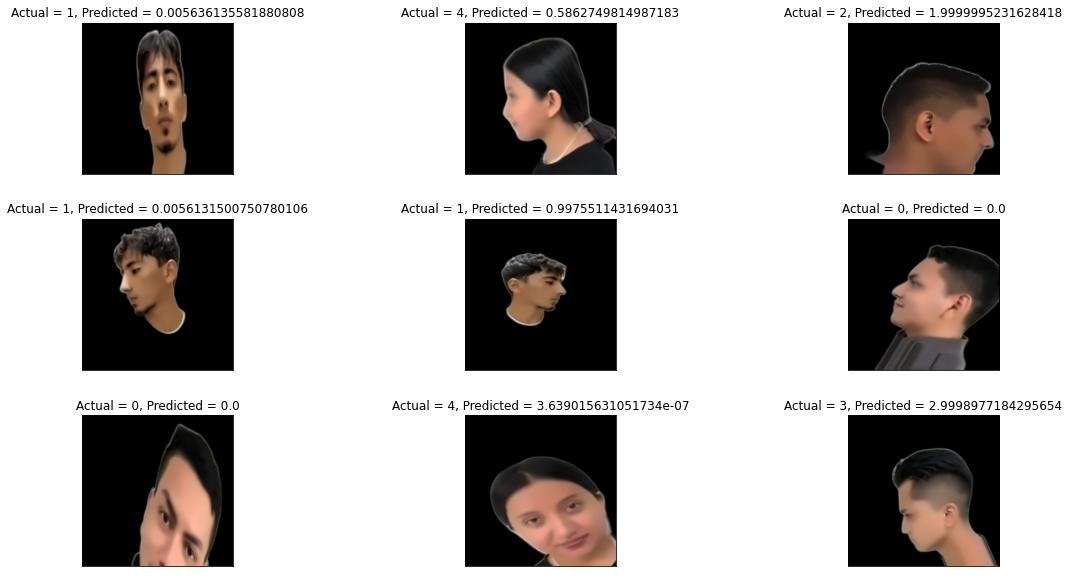

In [79]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, test_ds.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(test_ds[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred[r[0]][test_labels[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

## Segundo Experimento


In [80]:
#Código que responde a la descripción anterior
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.8))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.8))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 27, 27, 96)       384       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 23, 23, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 11, 11, 256)      0         
 2D)                                                             
                                                      

In [81]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [82]:
%%time
model.fit(train_ds, train_labels, epochs=25)

Epoch 1/25
4/4 [==============================] - 36s 8s/step - loss: 3.7419 - accuracy: 0.0504
Epoch 2/25
4/4 [==============================] - 23s 5s/step - loss: 3.4013 - accuracy: 0.0504
Epoch 3/25
4/4 [==============================] - 23s 6s/step - loss: 2.5606 - accuracy: 0.2269
Epoch 4/25
4/4 [==============================] - 24s 6s/step - loss: 2.2001 - accuracy: 0.3613
Epoch 5/25
4/4 [==============================] - 23s 5s/step - loss: 1.7732 - accuracy: 0.5294
Epoch 6/25
4/4 [==============================] - 23s 6s/step - loss: 1.3801 - accuracy: 0.6134
Epoch 7/25
4/4 [==============================] - 23s 6s/step - loss: 1.4462 - accuracy: 0.6134
Epoch 8/25
4/4 [==============================] - 36s 10s/step - loss: 1.2764 - accuracy: 0.6723
Epoch 9/25
4/4 [==============================] - 26s 6s/step - loss: 1.2666 - accuracy: 0.6303
Epoch 10/25
4/4 [==============================] - 22s 5s/step - loss: 1.2030 - accuracy: 0.6134
Epoch 11/25
4/4 [=====================

## Evaluar el modelo

In [83]:
loss, accuracy = model.evaluate(test_ds, test_labels)

print(loss,accuracy)

1/1 [==============================] - 2s 2s/step - loss: 16.8953 - accuracy: 0.2667
16.895294189453125 0.2666666805744171


## Predecir el modelo

In [84]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
pred = model.predict(test_ds)

pred.shape

1/1 [==============================] - 3s 3s/step


(30, 20)

## Muestre pocas imágenes aleatorias con valores de etiquetas reales versus predichos

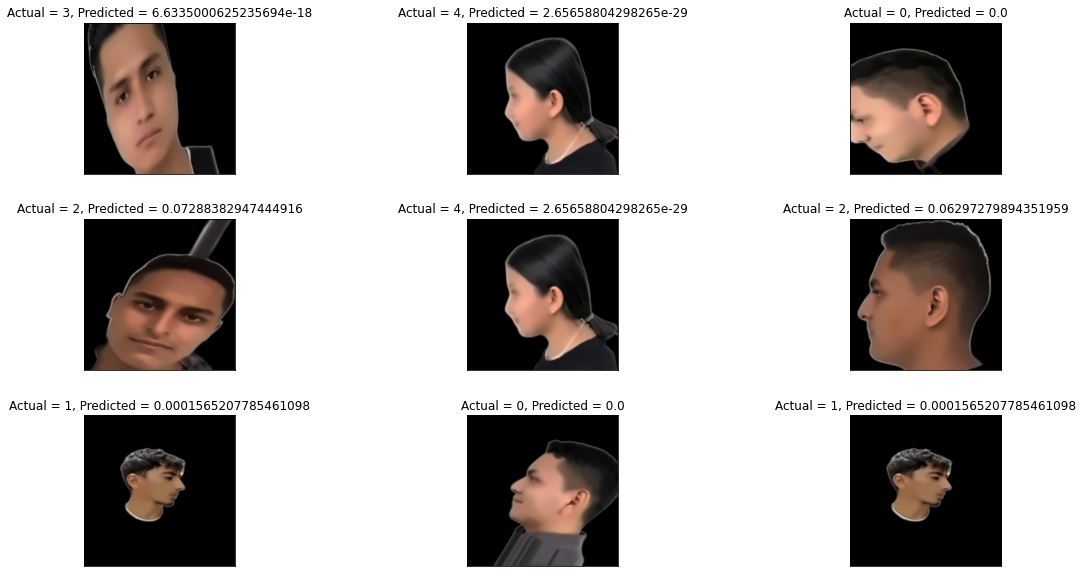

In [88]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, test_ds.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(test_ds[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred[r[0]][test_labels[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

## Tercer Experimento

In [91]:
#Código que responde a la descripción anterior
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=50,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=156,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=156,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=56,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.2))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.2))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.2))

model.add(BatchNormalization())

#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 55, 55, 50)        18200     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 27, 27, 50)       0         
 g2D)                                                            
                                                                 
 batch_normalization_24 (Bat  (None, 27, 27, 50)       200       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 23, 23, 156)       195156    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 11, 11, 156)      0         
 g2D)                                                            
                                                      

In [92]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [93]:
%%time
model.fit(train_ds, train_labels, epochs=50)

Epoch 1/50
4/4 [==============================] - 17s 3s/step - loss: 2.6381 - accuracy: 0.4370
Epoch 2/50
4/4 [==============================] - 15s 4s/step - loss: 2.6538 - accuracy: 0.6218
Epoch 3/50
4/4 [==============================] - 18s 4s/step - loss: 0.8157 - accuracy: 0.8319
Epoch 4/50
4/4 [==============================] - 15s 4s/step - loss: 0.4459 - accuracy: 0.8235
Epoch 5/50
4/4 [==============================] - 16s 3s/step - loss: 0.4233 - accuracy: 0.8487
Epoch 6/50
4/4 [==============================] - 12s 3s/step - loss: 0.1173 - accuracy: 0.9664
Epoch 7/50
4/4 [==============================] - 11s 3s/step - loss: 0.2046 - accuracy: 0.9328
Epoch 8/50
4/4 [==============================] - 11s 3s/step - loss: 0.4278 - accuracy: 0.9076
Epoch 9/50
4/4 [==============================] - 10s 2s/step - loss: 0.2040 - accuracy: 0.9496
Epoch 10/50
4/4 [==============================] - 13s 3s/step - loss: 0.2030 - accuracy: 0.9496
Epoch 11/50
4/4 [======================

## Evaluar el modelo

In [94]:
loss, accuracy = model.evaluate(test_ds, test_labels)

print(loss,accuracy)

1/1 [==============================] - 1s 1s/step - loss: 3.2541 - accuracy: 0.5667
3.254077911376953 0.5666666626930237


## Predecir el modelo

In [95]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
pred = model.predict(test_ds)

pred.shape

1/1 [==============================] - 1s 1s/step


(30, 20)

## Muestre pocas imágenes aleatorias con valores de etiquetas reales versus predichos

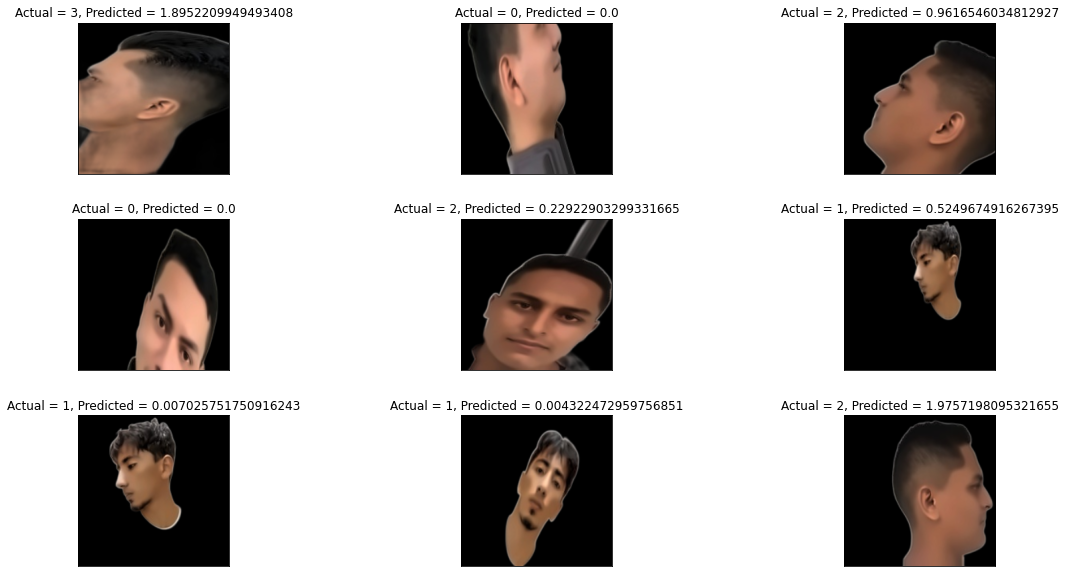

In [99]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, test_ds.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(test_ds[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred[r[0]][test_labels[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

## Cuarto Experimento

In [9]:
#Código que responde a la descripción anterior
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=75,kernel_size=(10,10),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=156,kernel_size=(6,6),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))


#5 conv layer
model.add(Conv2D(filters=56,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.9))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.9))

model.add(BatchNormalization())



#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 55, 55, 75)        22575     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 27, 27, 75)       0         
 g2D)                                                            
                                                                 
 batch_normalization_23 (Bat  (None, 27, 27, 75)       300       
 chNormalization)                                                
                                                                 
 conv2d_24 (Conv2D)          (None, 22, 22, 156)       421356    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 10, 10, 156)      0         
 g2D)                                                            
                                                      

In [10]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [26]:
%%time
model.fit(train_ds, train_labels, epochs=75)

Epoch 1/75
4/4 [==============================] - 16s 3s/step - loss: 3.5272 - accuracy: 0.0588
Epoch 2/75
4/4 [==============================] - 11s 3s/step - loss: 3.4573 - accuracy: 0.0756
Epoch 3/75
4/4 [==============================] - 11s 3s/step - loss: 3.0891 - accuracy: 0.1513
Epoch 4/75
4/4 [==============================] - 11s 3s/step - loss: 2.7948 - accuracy: 0.1765
Epoch 5/75
4/4 [==============================] - 12s 3s/step - loss: 2.7949 - accuracy: 0.1765
Epoch 6/75
4/4 [==============================] - 11s 3s/step - loss: 2.4856 - accuracy: 0.1849
Epoch 7/75
4/4 [==============================] - 11s 3s/step - loss: 2.1019 - accuracy: 0.3529
Epoch 8/75
4/4 [==============================] - 12s 3s/step - loss: 2.0815 - accuracy: 0.3782
Epoch 9/75
4/4 [==============================] - 11s 3s/step - loss: 1.8766 - accuracy: 0.3950
Epoch 10/75
4/4 [==============================] - 11s 3s/step - loss: 1.7785 - accuracy: 0.4622
Epoch 11/75
4/4 [======================

## Evaluar el modelo

In [27]:
loss, accuracy = model.evaluate(test_ds, test_labels)

print(loss,accuracy)

1/1 [==============================] - 2s 2s/step - loss: 2.2352 - accuracy: 0.6000
2.2351696491241455 0.6000000238418579


## Predecir el modelo

In [28]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
pred = model.predict(test_ds)

pred.shape

1/1 [==============================] - 2s 2s/step


(30, 20)

## Muestre pocas imágenes aleatorias con valores de etiquetas reales versus predichos

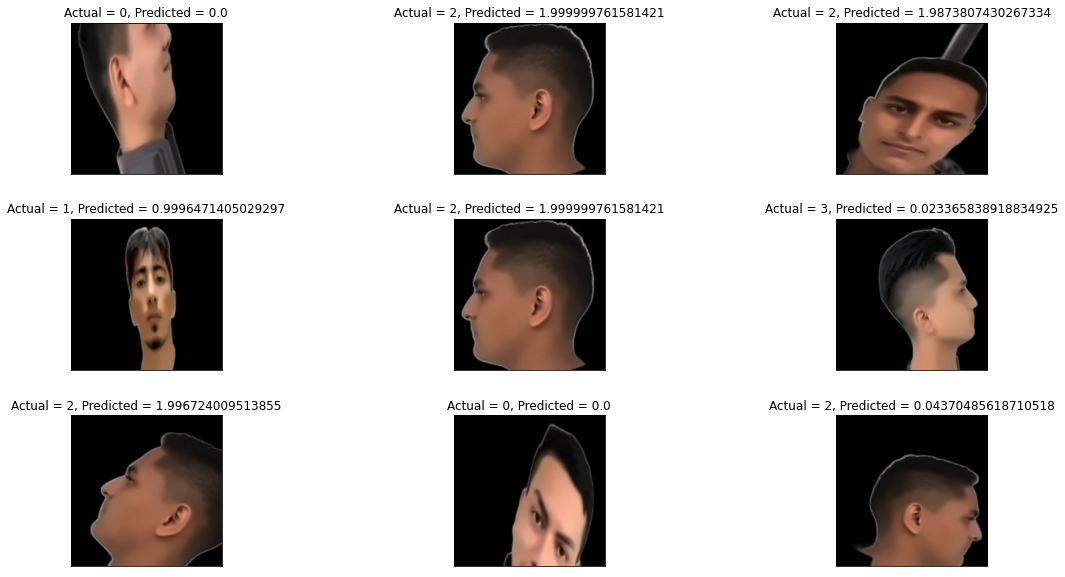

In [31]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, test_ds.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(test_ds[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred[r[0]][test_labels[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

## Quinto Experimento

In [32]:
#Código que responde a la descripción anterior
model=Sequential()

#1 conv layer
model.add(Conv2D(filters=150,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(227,227,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=100,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())
#4 conv layer
model.add(Conv2D(filters=140,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=200,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 conv layer
model.add(Conv2D(filters=140,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 conv layer
model.add(Conv2D(filters=160,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.7))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.5))

model.add(BatchNormalization())

#1 dense layer
model.add(Dense(4096,input_shape=(227,227,3),activation="relu"))

model.add(Dropout(0.9))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.5))

model.add(BatchNormalization())



#output layer
model.add(Dense(20,activation="softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 55, 55, 150)       54600     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 27, 27, 150)      0         
 g2D)                                                            
                                                                 
 batch_normalization_28 (Bat  (None, 27, 27, 150)      600       
 chNormalization)                                                
                                                                 
 conv2d_28 (Conv2D)          (None, 23, 23, 100)       375100    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 11, 11, 100)      0         
 g2D)                                                            
                                                      

In [33]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [34]:
%%time
model.fit(train_ds, train_labels, epochs=100)

Epoch 1/100
4/4 [==============================] - 28s 5s/step - loss: 3.7903 - accuracy: 0.0420
Epoch 2/100
4/4 [==============================] - 22s 5s/step - loss: 3.6019 - accuracy: 0.0924
Epoch 3/100
4/4 [==============================] - 22s 6s/step - loss: 3.6062 - accuracy: 0.0420
Epoch 4/100
4/4 [==============================] - 21s 5s/step - loss: 3.0395 - accuracy: 0.1765
Epoch 5/100
4/4 [==============================] - 21s 5s/step - loss: 2.5155 - accuracy: 0.3025
Epoch 6/100
4/4 [==============================] - 23s 5s/step - loss: 2.1814 - accuracy: 0.4118
Epoch 7/100
4/4 [==============================] - 22s 6s/step - loss: 2.0325 - accuracy: 0.4538
Epoch 8/100
4/4 [==============================] - 23s 5s/step - loss: 1.9231 - accuracy: 0.5042
Epoch 9/100
4/4 [==============================] - 29s 6s/step - loss: 1.6088 - accuracy: 0.5966
Epoch 10/100
4/4 [==============================] - 21s 5s/step - loss: 1.6800 - accuracy: 0.5378
Epoch 11/100
4/4 [===========

4/4 [==============================] - 18s 4s/step - loss: 0.3389 - accuracy: 0.8992
Epoch 85/100
4/4 [==============================] - 19s 5s/step - loss: 0.4551 - accuracy: 0.8487
Epoch 86/100
4/4 [==============================] - 18s 4s/step - loss: 0.4486 - accuracy: 0.8487
Epoch 87/100
4/4 [==============================] - 18s 4s/step - loss: 0.5446 - accuracy: 0.8571
Epoch 88/100
4/4 [==============================] - 20s 5s/step - loss: 0.3581 - accuracy: 0.8571
Epoch 89/100
4/4 [==============================] - 22s 6s/step - loss: 0.2300 - accuracy: 0.9244
Epoch 90/100
4/4 [==============================] - 19s 5s/step - loss: 0.3143 - accuracy: 0.8739
Epoch 91/100
4/4 [==============================] - 20s 5s/step - loss: 0.3500 - accuracy: 0.8992
Epoch 92/100
4/4 [==============================] - 19s 5s/step - loss: 0.1510 - accuracy: 0.9412
Epoch 93/100
4/4 [==============================] - 18s 4s/step - loss: 0.1866 - accuracy: 0.9244
Epoch 94/100
4/4 [===============

## Evaluar el modelo

In [35]:
loss, accuracy = model.evaluate(test_ds, test_labels)

print(loss,accuracy)

1/1 [==============================] - 2s 2s/step - loss: 5.3047 - accuracy: 0.5333
5.304726600646973 0.5333333611488342


## Predecir el modelo

In [36]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. Describa cuál es.
pred = model.predict(test_ds)

pred.shape

1/1 [==============================] - 2s 2s/step


(30, 20)

## Muestre pocas imágenes aleatorias con valores de etiquetas reales versus predichos

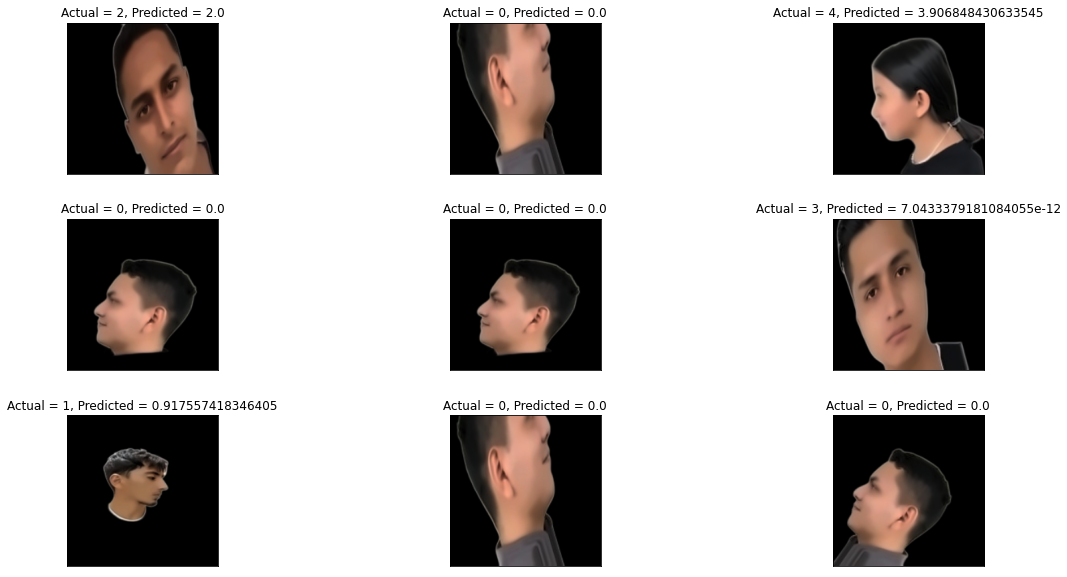

In [39]:
plt.figure(1 , figsize = (19 , 10))
n = 0 

for i in range(9):
    n += 1 
    r = np.random.randint( 0, test_ds.shape[0], 1)
    
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
    
    plt.imshow(test_ds[r[0]])
    plt.title('Actual = {}, Predicted = {}'.format(test_labels[r[0]] , test_labels[r[0]]*pred[r[0]][test_labels[r[0]]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()